<a href="https://colab.research.google.com/github/JotaBlanco/TheValley/blob/main/Notebooks/02-analisis-exploratorio-visual/EJERCICIO_3___EDA_Visual_Covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRO: Ejercicio EDA Visual Covid
Ejercicio para afianzar los conceptos básicos de EDA (Exploratory Data Analysis) Visual utilizando datos sobre la evolución del Covid.

Notebook por [Javier Blanco Cordero](https://www.linkedin.com/in/javier-blanco-cordero-71373656/).

### Enlaces de interés
*   [Slides de presentación](https://docs.google.com/presentation/d/1N7MPSC7ntM-0ZEHlrN5xRTpT4uNDyU_o53GBvnojUx8/edit?usp=sharing)
*   [Enlace a al notebook de Colab de la clase 2](https://colab.research.google.com/github/JotaBlanco/TheValley/blob/main/Notebooks/02-analisis-exploratorio-visual/02___Analisis_exploratorio_visual.ipynb)
*   [Enlace a este notebook de Colab](https://colab.research.google.com/github/JotaBlanco/TheValley/blob/main/Notebooks/02-analisis-exploratorio-visual/EJERCICIO_3___EDA_Visual_Covid.ipynb)




# 01 Import
Importamos todas las librerías necesarias para este análisis ([¿No sabes lo que es una librería de Python?](https://www.quora.com/What-is-a-Python-library-and-what-can-I-use-it-for)).

Incluye pandas, numpy, matplotlib y seaborn.

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 02 Load Data
Recordemos, hemos visto 3 maneras de importar datos en Colab:

*   Importar una tabla desde Github
*   Cargar (y luego importar) una tabla de nuestro local
*   Importar una tabla de Google Drive

### 0201 Importa dataframe Covid-19
Os he dejado en mi Google Drive: 
*   [este archivo](https://drive.google.com/file/d/1s7KH9Zke0b862uFtoGYZI2gEKgJPDDTY/view?usp=sharing) con casos Covid-19 confirmados para ciertos países. 
*   [este archivo](https://drive.google.com/drive/u/0/folders/1r-Qm0wF70NmWnUrZzVpjodBc2rT0lIPq) con muertes por Covid-19 confirmadas para esos mismos países. 

Para cada país, cada tabla contiene contiene:

*   X: Los casos/fallecimientos confirmados acumulados en el país X
*   X_REL: Los casos/fallecimientos confirmados acumulados en el país X por cada 100.000 habitantes. 
*   X_ult7: Los casos/fallecimientos confirmados en los últimos 7 días en el país X.
*   X_REL_ult7: Los casos/fallecimientos confirmados en los últimos 7 días en el país X por cada 100.000 habitantes.

Importa los datos del Covid como prefieras en dos dataframes: **df_casos_covid** y **df_muertes_covid** y modifica en ambos casos la columna fecha para que esté en un formato de tipo fecha.

In [59]:
# Primero emparejamos Colab con Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
# Importamos el archivos usando read_csv()
dir_archivo = '/content/drive/My Drive/Data/Clases/Covid_Casos_Clean.csv'
df_casos_covid = pd.read_csv(dir_archivo)
df_casos_covid.head()

,Date,China,France,Germany,Italy,Portugal,Spain,UK,US,China_REL,France_REL,Germany_REL,Italy_REL,Portugal_REL,Spain_REL,UK_REL,US_REL,China_ult7,France_ult7,Germany_ult7,Italy_ult7,Portugal_ult7,Spain_ult7,UK_ult7,US_ult7,China_REL_ult7,France_REL_ult7,Germany_REL_ult7,Italy_REL_ult7,Portugal_REL_ult7,Spain_REL_ult7,UK_REL_ult7,US_REL_ult7
0,2020-01-22,548,0,0,0,0,0,0,1,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-23,643,0,0,0,0,0,0,1,0.05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-24,920,2,0,0,0,0,0,2,0.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-25,1406,3,0,0,0,0,0,2,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-26,2075,3,0,0,0,0,0,5,0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
# Importamos el archivos usando read_csv()
dir_archivo = '/content/drive/My Drive/Data/Clases/Covid_Muertes_Clean.csv'
df_muertes_covid = pd.read_csv(dir_archivo)
df_muertes_covid.head()

,Date,China,France,Germany,Italy,Portugal,Spain,UK,US,China_REL,France_REL,Germany_REL,Italy_REL,Portugal_REL,Spain_REL,UK_REL,US_REL,China_ult7,France_ult7,Germany_ult7,Italy_ult7,Portugal_ult7,Spain_ult7,UK_ult7,US_ult7,China_REL_ult7,France_REL_ult7,Germany_REL_ult7,Italy_REL_ult7,Portugal_REL_ult7,Spain_REL_ult7,UK_REL_ult7,US_REL_ult7
0,2020-01-22,17,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-23,18,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-24,26,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-25,42,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-26,56,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
# Cambiamos el formato de la columna 'Date'
df_casos_covid['Date'] = pd.to_datetime(
    df_casos_covid['Date'], format='%Y-%m-%d', errors='ignore')

df_muertes_covid['Date'] = pd.to_datetime(
    df_muertes_covid['Date'], format='%Y-%m-%d', errors='ignore')

# 02 Comprobaciones básicas
Comprueba el tamaño y variables de ambos dataframes.

Son iguales?

In [63]:
# Tamaño
display(df_casos_covid.shape)
display(df_muertes_covid.shape)

(367, 33)

(367, 33)

In [64]:
# Hay alguna columna en el dataframe de casos no presente en el de muertes?
cols_unicas = [col for col in df_casos_covid.columns if col not in df_muertes_covid.columns]
cols_unicas


[]

In [65]:
# Las filsa representan las mismas fechas?
print('Fechas casos', df_casos_covid['Date'].min(), df_casos_covid['Date'].max())
print('Fechas muertes', df_muertes_covid['Date'].min(), df_muertes_covid['Date'].max())

Fechas casos 2020-01-22 00:00:00 2021-01-22 00:00:00
Fechas muertes 2020-01-22 00:00:00 2021-01-22 00:00:00


# 03 Crea dataframe tasa mortalidad
Puesto que los dataframes son iguales (en cuanto a forma) podemos hacer operaciones con ellos.

Crea un nuevo dataframe **df_tasa_mortalidad** que sea el resultado de dividir el dataframe con los fallecimientos entre el dataframe con el número de casos. Además, ten en cuenta: 
*   Las tasas de mortalidad no tienen tanto sentido para los últimos 7 días, ni tiene sentido el resultado de dividir las cifras en términos relativos, por lo que nos cargamos todas esas variables. 
*   Rellenamos también los nulos con 0.
*   Convertimos las tasas de mortalidad en porcentajes con dos cifras decimales XX.XX%

In [67]:
# Generamos el dataframe df_tasa_mortalidad dividiendo el de muertes/casos

# La columna Fecha no se puede dividir entre otra columna Fecha
df_tasa_mortalidad = df_muertes_covid.iloc[:,1:]/df_casos_covid.iloc[:,1:]

# Ahora añadimos la columna fecha
df_tasa_mortalidad.insert(0, 'Date', df_casos_covid['Date'])

df_tasa_mortalidad.head()

,Date,China,France,Germany,Italy,Portugal,Spain,UK,US,China_REL,France_REL,Germany_REL,Italy_REL,Portugal_REL,Spain_REL,UK_REL,US_REL,China_ult7,France_ult7,Germany_ult7,Italy_ult7,Portugal_ult7,Spain_ult7,UK_ult7,US_ult7,China_REL_ult7,France_REL_ult7,Germany_REL_ult7,Italy_REL_ult7,Portugal_REL_ult7,Spain_REL_ult7,UK_REL_ult7,US_REL_ult7
0,2020-01-22,0.031022,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-23,0.027994,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-24,0.028261,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-25,0.029872,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-26,0.026988,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
# Nos quedamos con las cols que no son acumuladas en los últimos 7 dias ni REL
cols = [col for col in df_tasa_mortalidad.columns if (('_ult7' not in col)&('REL' not in col))]
cols

['Date',
 'China',
 'France',
 'Germany',
 'Italy',
 'Portugal',
 'Spain',
 'UK',
 'US']

In [70]:
# Nos quedamos con las columnas adecuadas
df_tasa_mortalidad = df_tasa_mortalidad[cols]

# Convertimos los nulls en 0s
df_tasa_mortalidad = df_tasa_mortalidad.fillna(0)

# Convertimos las cifras en porcentajes
df_tasa_mortalidad.iloc[:,1:] = np.round(df_tasa_mortalidad.iloc[:,1:]*100, 2)

# Visualizamos algunos registros
df_tasa_mortalidad.head()

,Date,China,France,Germany,Italy,Portugal,Spain,UK,US
0,2020-01-22,310.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-23,280.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-24,283.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-25,299.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-26,270.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 04 Visualiza la evolución de la tasa de mortalidad
Visualiza la evolución de la tasa de mortalidad para los distintos países, donde mostremos:
- La línea de España en amarillo (con doble grosor)
- La línea de China en rojo, la de UK en azul y la de US en negro

Es decir, genera [esta imagen](https://drive.google.com/file/d/1ovUlcKY-ZVR1rxR-70BoWAuhPqpGgE2v/view?usp=sharing).

In [74]:
# Utilizamos seaborn para mejorar la estética
sns.set()

In [75]:
# Este diccionario de colores por país nos permitirá utilizar un código más sencillo en el loop
dic_colores = {'China': 'red',
               'France': 'grey', 
               'Germany': 'grey', 
               'Italy': 'grey', 
               'Portugal': 'grey',
               'Spain': 'yellow', 
               'UK': 'blue', 
               'US': 'black'
               }

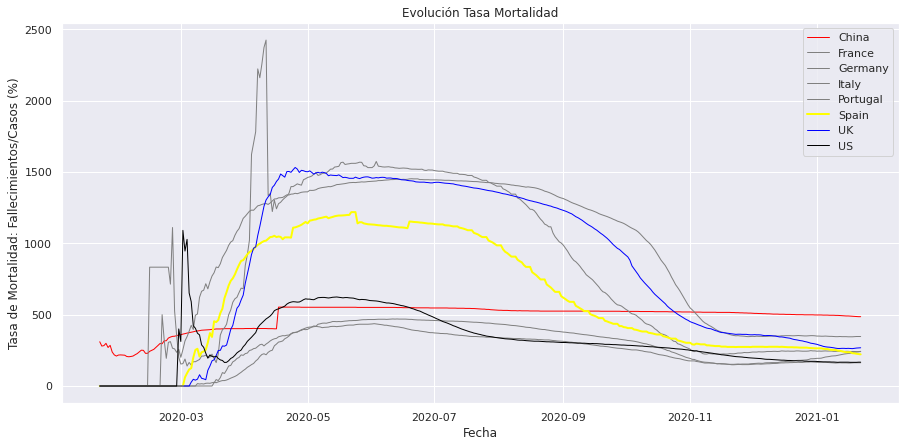

In [79]:
# Generamos la imagen con la visualización
# Tamaño de la imagen (ancho, alto)
plt.figure(figsize=(15, 7))

# Generamos el gráfico con un loop
for pais in df_tasa_mortalidad.columns[1:]:
  plt.plot(df_tasa_mortalidad['Date'], 
           df_tasa_mortalidad[pais], 
           label = pais, 
           color = dic_colores[pais], 
           linewidth = 2 if pais == 'Spain' else 1)

# Añadimos detalles a la imagen
plt.legend()
plt.title('Evolución Tasa Mortalidad')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Mortalidad: Fallecimientos/Casos (%)')
plt.show()

## Reflexiona sobre el gráfico
- 1) Si la tasa de mortalidad es una buena medida del control de la enfermedad (o más bien del posible desborde de los servicios hospitalarios) quién la está controlando mejor?

- 2) Hay ciertos escalones en los datos, qué nos dice esto?

- 3) Explica los datos de China, por qué su curva tiene una forma distinta? Su tasa de mortalidad a día de hoy es la peor, por qué? 

1) No es necesario que esta pregunta tenga una respuesta binaria. Las grandes subidas en la tasa de mortalidad se pueden deber a dos problemas:


*   Falta de capacidad para detectar casos (denominador de la tasa infrarepresntado)
*   Falta de capacidad para tratar a enfermos que con el correcto tratamiento habrían sobrevivido (aumento en el numerador por desborde de medios).

A principios de la pandemia probablemente era lo primero en gran medida, con cierta contribución de lo segundo, lo que hizo subir las tasas en todos los países.

La mejora en la capacidad de detección fue haciendo que, paulatinamente se solucionara el problema 1 y la tasa fuera evolucionando hacia puntos de convergencia parecidos en todos los países. 

Sí son preocupantes aumentos recientes en la tasa, que pueden apuntar al problema 2, mucho más severo. Es el caso de Portugal y Alemania.

US parece haber mantenido su tasa de mortalidad realtivamente baja en todo momento, por lo que parece que su sistema no ha tenido faltas de capacidad notables.



2) Claro indicador de la mala calidad de los datos en casi todos los países, que se corrigen a posteriori.

3) China, como el resto, se vió superado en la primera ola. Tanto sus datos de casos como fallecidos son dudosos. Su tasa, en cambio, no ha ido reduciéndose al no haber tenido un número considerable de casos desde entonces.

# 05 Visualiza la Tasa de Mortalidad VS Otras Métricas
Con el mismo código de colores que en el anterior ejercicio, genera una imagen (fig) con 3 gráficos (ax) -en una sola columna- donde se visualice respectivamente:
- Fallecimientos
- Casos Confirmados
- Tasa de Mortalidad

Es decir, genera [esta imagen](https://drive.google.com/file/d/16SYlqCZ5NQ1S1JZpwR1J-Tq8-FGWysIO/view?usp=sharing).

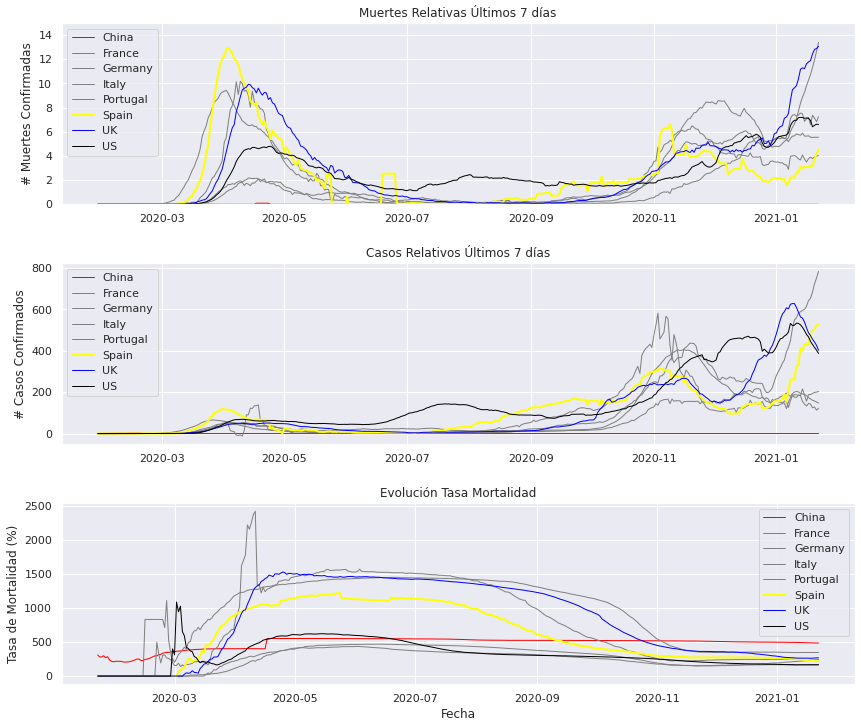

In [82]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1)
fig.tight_layout(pad=0)
fig.set_size_inches(12,10)

for pais in df_tasa_mortalidad.columns[1:]:
  # Tasa de mortalidad
  ax1.plot(df_muertes_covid['Date'], 
           df_muertes_covid[pais+'_REL_ult7'], 
           label = pais, 
           color = dic_colores[pais], 
           linewidth = 2 if pais == 'Spain' else 1)
  ax1.set(title = 'Muertes Relativas Últimos 7 días',  
          ylabel = '# Muertes Confirmadas')
  ax1.set_ylim(bottom=0,top=15)
  ax1.legend()
  
  # Tasa de mortalidad
  ax2.plot(df_casos_covid['Date'], 
           df_casos_covid[pais+'_REL_ult7'], 
           label = pais, 
           color = dic_colores[pais], 
           linewidth = 2 if pais == 'Spain' else 1)
  ax2.set(title = 'Casos Relativos Últimos 7 días', 
          ylabel = '# Casos Confirmados')
  ax2.legend()

  # Tasa de mortalidad
  ax3.plot(df_tasa_mortalidad['Date'], 
           df_tasa_mortalidad[pais], 
           label = pais, 
           color = dic_colores[pais], 
           linewidth = 2 if pais == 'Spain' else 1)
  ax3.set(title = 'Evolución Tasa Mortalidad', 
          xlabel = 'Fecha', 
          ylabel = 'Tasa de Mortalidad (%)')
  ax3.legend()

plt.show()

## Reflexiona sobre el gráfico
- 1) Qué explica la evolución de la tasa de mortalidad en España (subida, seguida de una meseta, y una paulatina bajada)?
- 2) Se aprecia un retardo entre las muertes y los casos?


1) Se cubre en el punto 1 de la reflexión a la pregunta anterior. El aumento de capacidad en confirmación de casos hay ido provocando que las tasas vayan convergiendo hacia un punto probablemente cercano al real en todos los países.

2) Sí, se puede apreciar visualmente que, en general, los picos en casos son seguidos de picos en mortalidad, pero con cierto retraso.

# 06 Comparar Tasas de Mortalidad
Comparemos las tasas de mortalidad acumulada en 3 días específicos:
- 1 de abril de 2020
- 1 de julio de 2020
- último día disponible

Muéstralos utilizando 3 gráficos (ax) de barras horizontales en una sola figura, con los 3 gráficos en una sola fila.


In [ ]:
df_tasa_mortalidad